<a href="https://colab.research.google.com/github/kanishkapg/Machine-Learning-Models/blob/main/EE5253Report__4530_4550_GP68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Life Expectancy Predictor**

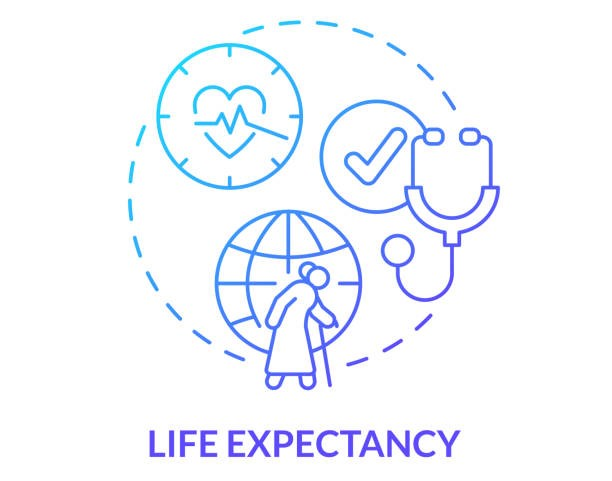

## **Group Details:**
- **Group Number:** 68

### **Student 1:**  
- **Name:** Gunasinghe Y.K.P.  
- **Registration Number:** EG/2021/4530  
- **Email:** kanishkapg1121@gmail.com  

### **Student 2:**  
- **Name:** Herath H.M.L.T.  
- **Registration Number:** EG/2021/4550  
- **Email:** levinduherath@gmail.com  

---

## **Project Title:**  
**Life Expectancy Prediction**

---

## **Project Description:**  
The Life Expectancy Predictor project aims to develop a machine learning model to estimate life
expectancy based on various socio-economic, health, and environmental features using the WHO
dataset from Kaggle. By collecting and preprocessing historical data, we will identify key factors
influencing life expectancy and train models using linear regression and random forest algorithms. This
project will provide valuable insights into the determinants of life expectancy, aiding policymakers,
healthcare providers, and researchers in making informed decisions to improve health outcomes and
longevity globally.

---

## **Dataset Information:**  
- **Dataset Link:** [Kaggle - Life Expectancy](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)  
- **Original Number of Features in the Dataset:** 21  
- **Target Variable:** **Life Expectancy**

---

## **Type of Problem:**  
**Supervised Learning - Regression**

---

## **Algorithms Selected:**  
- **Algorithm 01:** Linear Regression  
- **Algorithm 02:** Random Forest Regression  

---

## **Task Breakdown:**  

In this project, we will follow a structured approach:  

1. **Exploratory Data Analysis (EDA):**  
   - Explore and visualize the dataset.  
   - Understand the distribution and relationships among features.  

2. **Data Preprocessing:**  
   - Handle missing values, outliers, and data transformations.  
   - Encode categorical variables if necessary.  
   - Normalize or scale the data for better model performance.  

3. **Model Implementation:**  
   - Implement **Random Forest Regression** and **Linear Regression** algorithms.  
   - Evaluate and compare model performance using metrics like **Mean Squared Error (MSE)** and **R-squared**.

---

## **Dataset Features Overview:**  
The dataset consists of the following features:  

- Country - Name of the country.
- Year - Year of the data.
- Status - Country status (Developed or Developing).
- Life expectancy - Life expectancy in years.
- Adult Mortality - Adult mortality rate per 1000 population (ages 15-60).
- Infant deaths - Number of infant deaths per 1000 population.
- Alcohol - Alcohol consumption per capita (liters).
- Percentage expenditure - Expenditure on health as a percentage of GDP.
- Hepatitis B - Hepatitis B immunization coverage among 1-year-olds (%).
- Measles - Number of reported cases of measles per 1000 population.
- BMI - Average body mass index of the population.
- Under-five deaths - Number of under-five deaths per 1000 population.
- Polio - Polio immunization coverage among 1-year-olds (%).
- Total expenditure - Total expenditure on health as a percentage of GDP.
- Diphtheria - Diphtheria immunization coverage among 1-year-olds (%).
- HIV/AIDS - Deaths per 1000 live births caused by HIV/AIDS (0–4 years).
- GDP - Gross Domestic Product per capita (current US$).
- Population - Population of the country.
- Thinness 1-19 years - Prevalence of thinness among children and teenagers (%).
- Thinness 5-9 years - Prevalence of thinness among younger children (%).
- Income composition of resources - Human Development Index (HDI) in terms of income composition.
-Schooling - Average number of years of schooling.

---

## **Notebook Outline:**  
1. **Introduction**  
2. **Loading and Exploring the Dataset**  
3. **Exploratory Data Analysis (EDA)**  
4. **Data Preprocessing**  
5. **Model Training and Evaluation**  
6. **Conclusion and Insights**

# **Loading and Exploring the Dataset**

**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
!pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

**Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Loading**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML datasets/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Print the shape of the dataframe
df.shape

(2938, 22)

In [ ]:
# Print a concise summary of the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# **Exploratory Data Analysis (EDA)**

In [ ]:
#descriptive statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


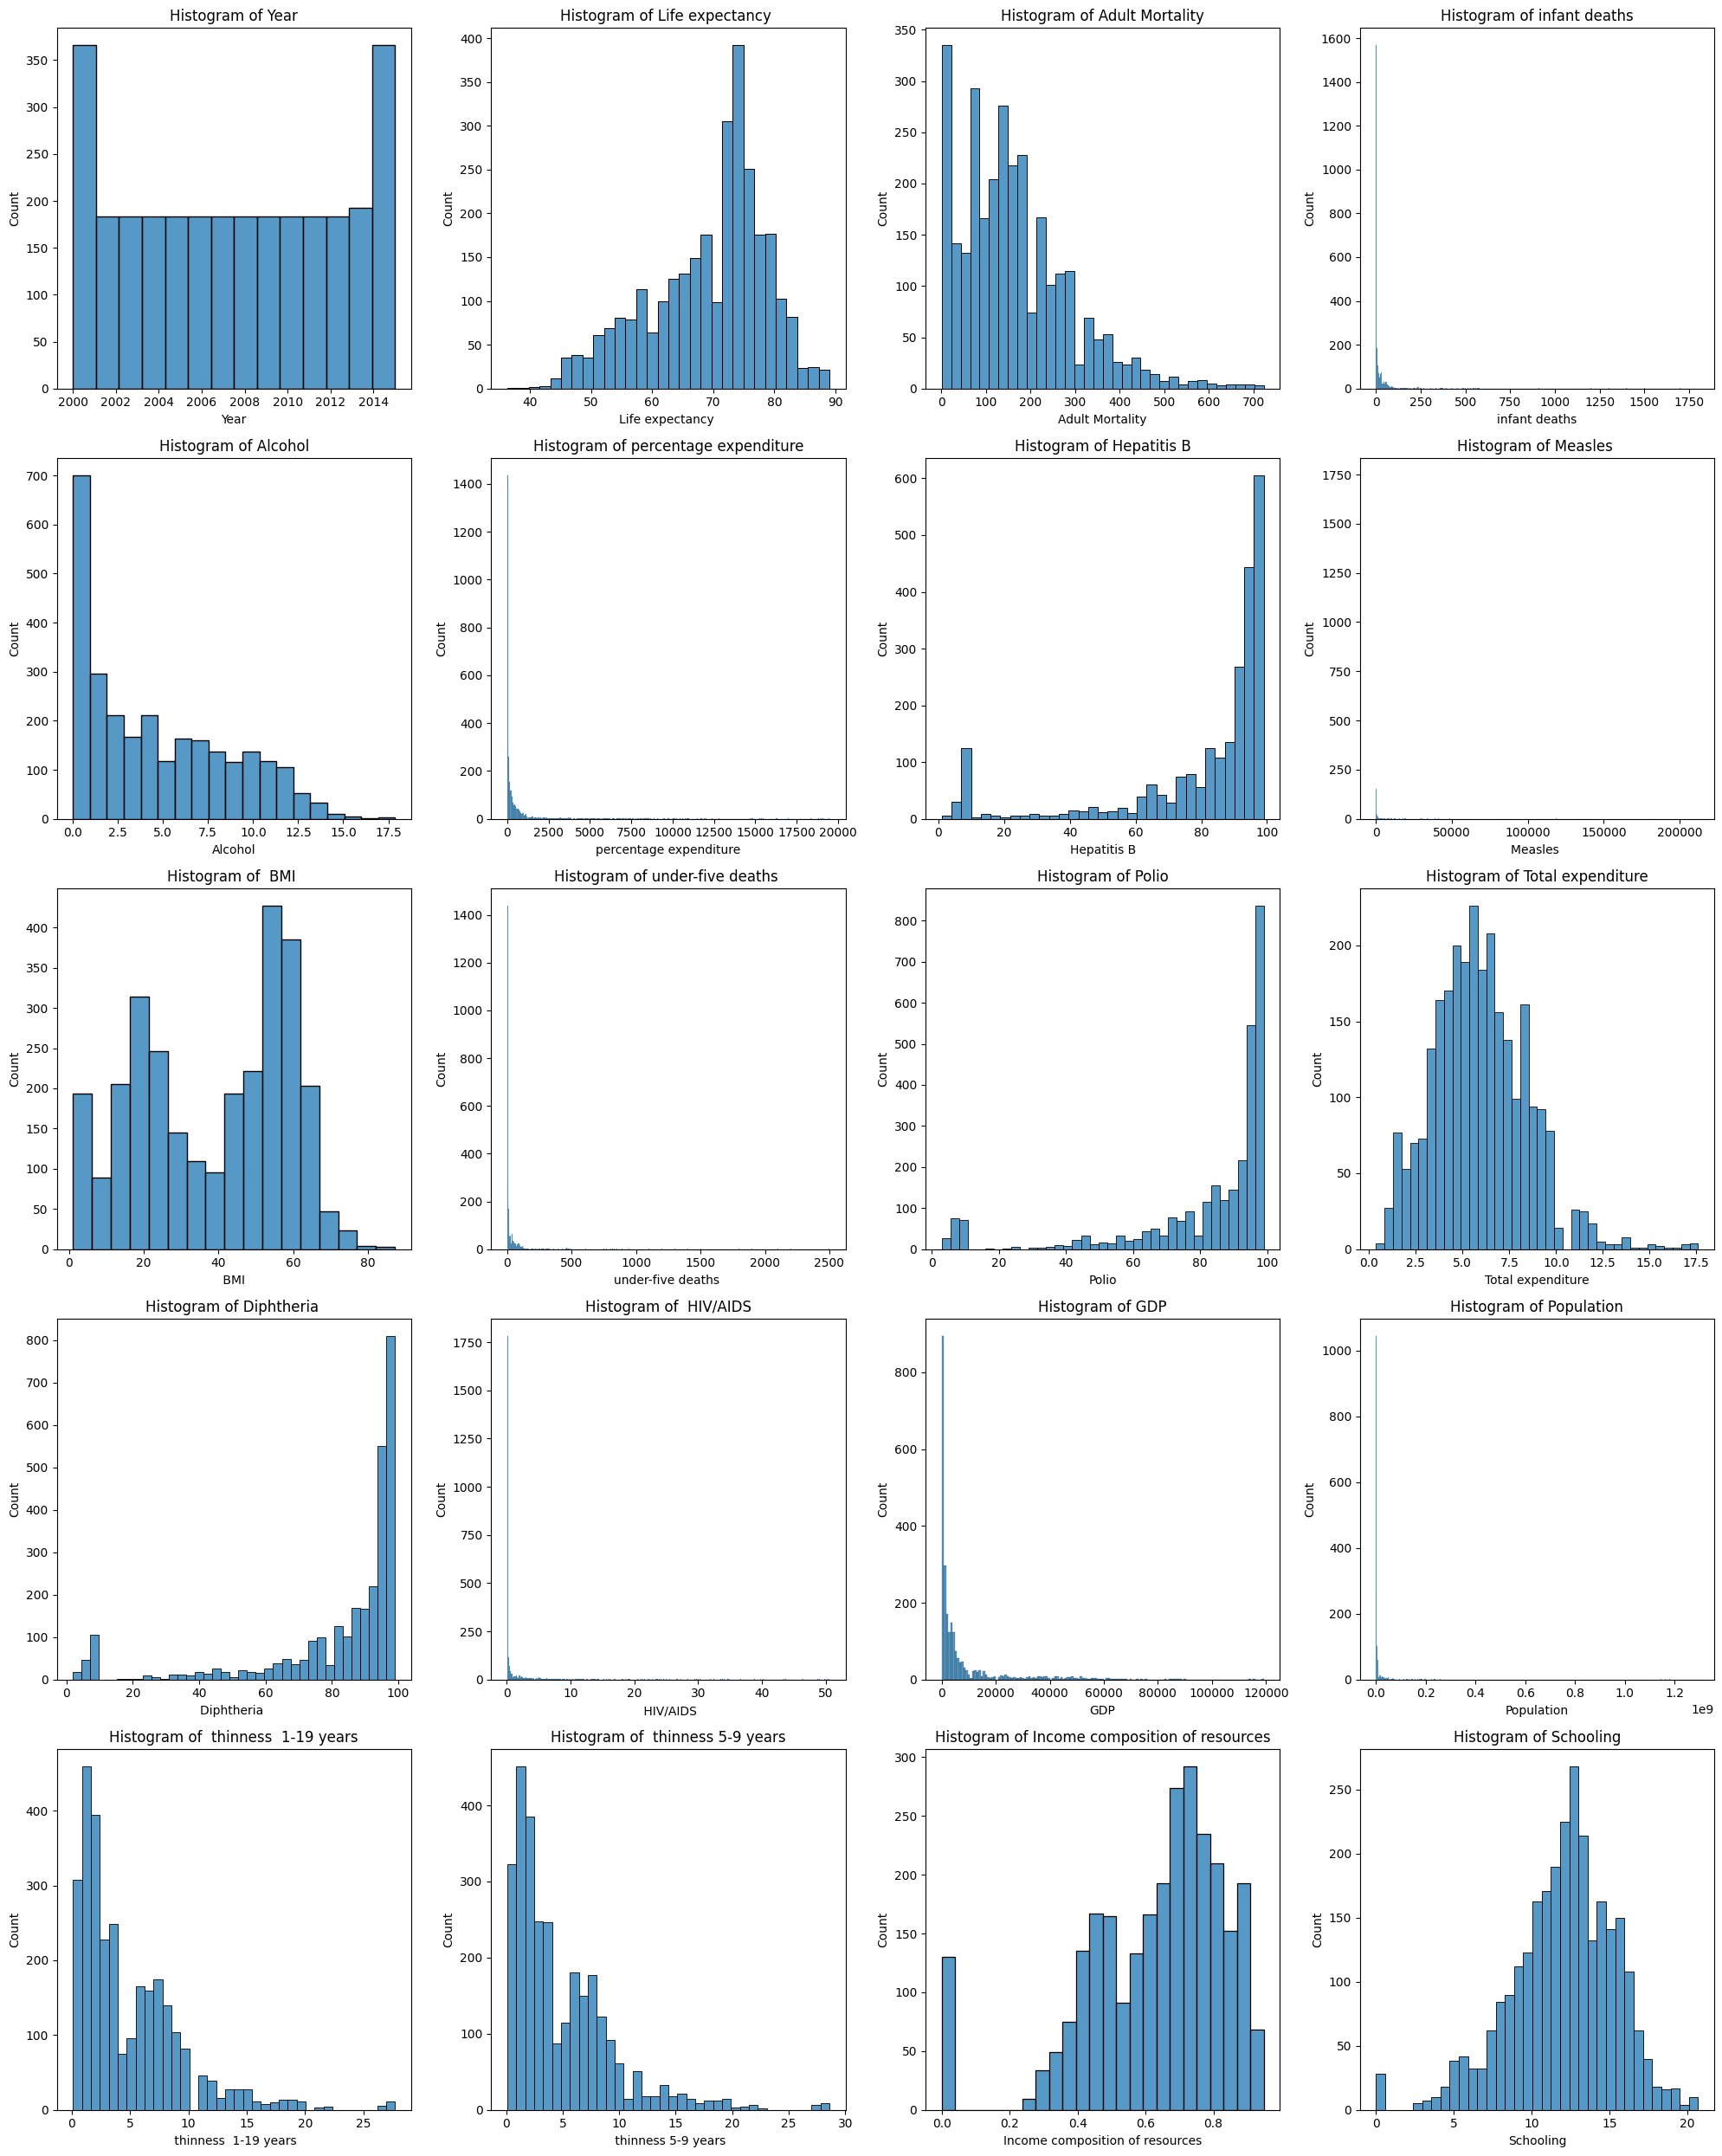

In [ ]:
#histogram to understand destribution
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Set the number of plots per row
plots_per_row = 4
total_plots = len(numeric_columns)
rows = math.ceil(total_plots / plots_per_row)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes for easier indexing

# Generate histograms for numeric columns
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

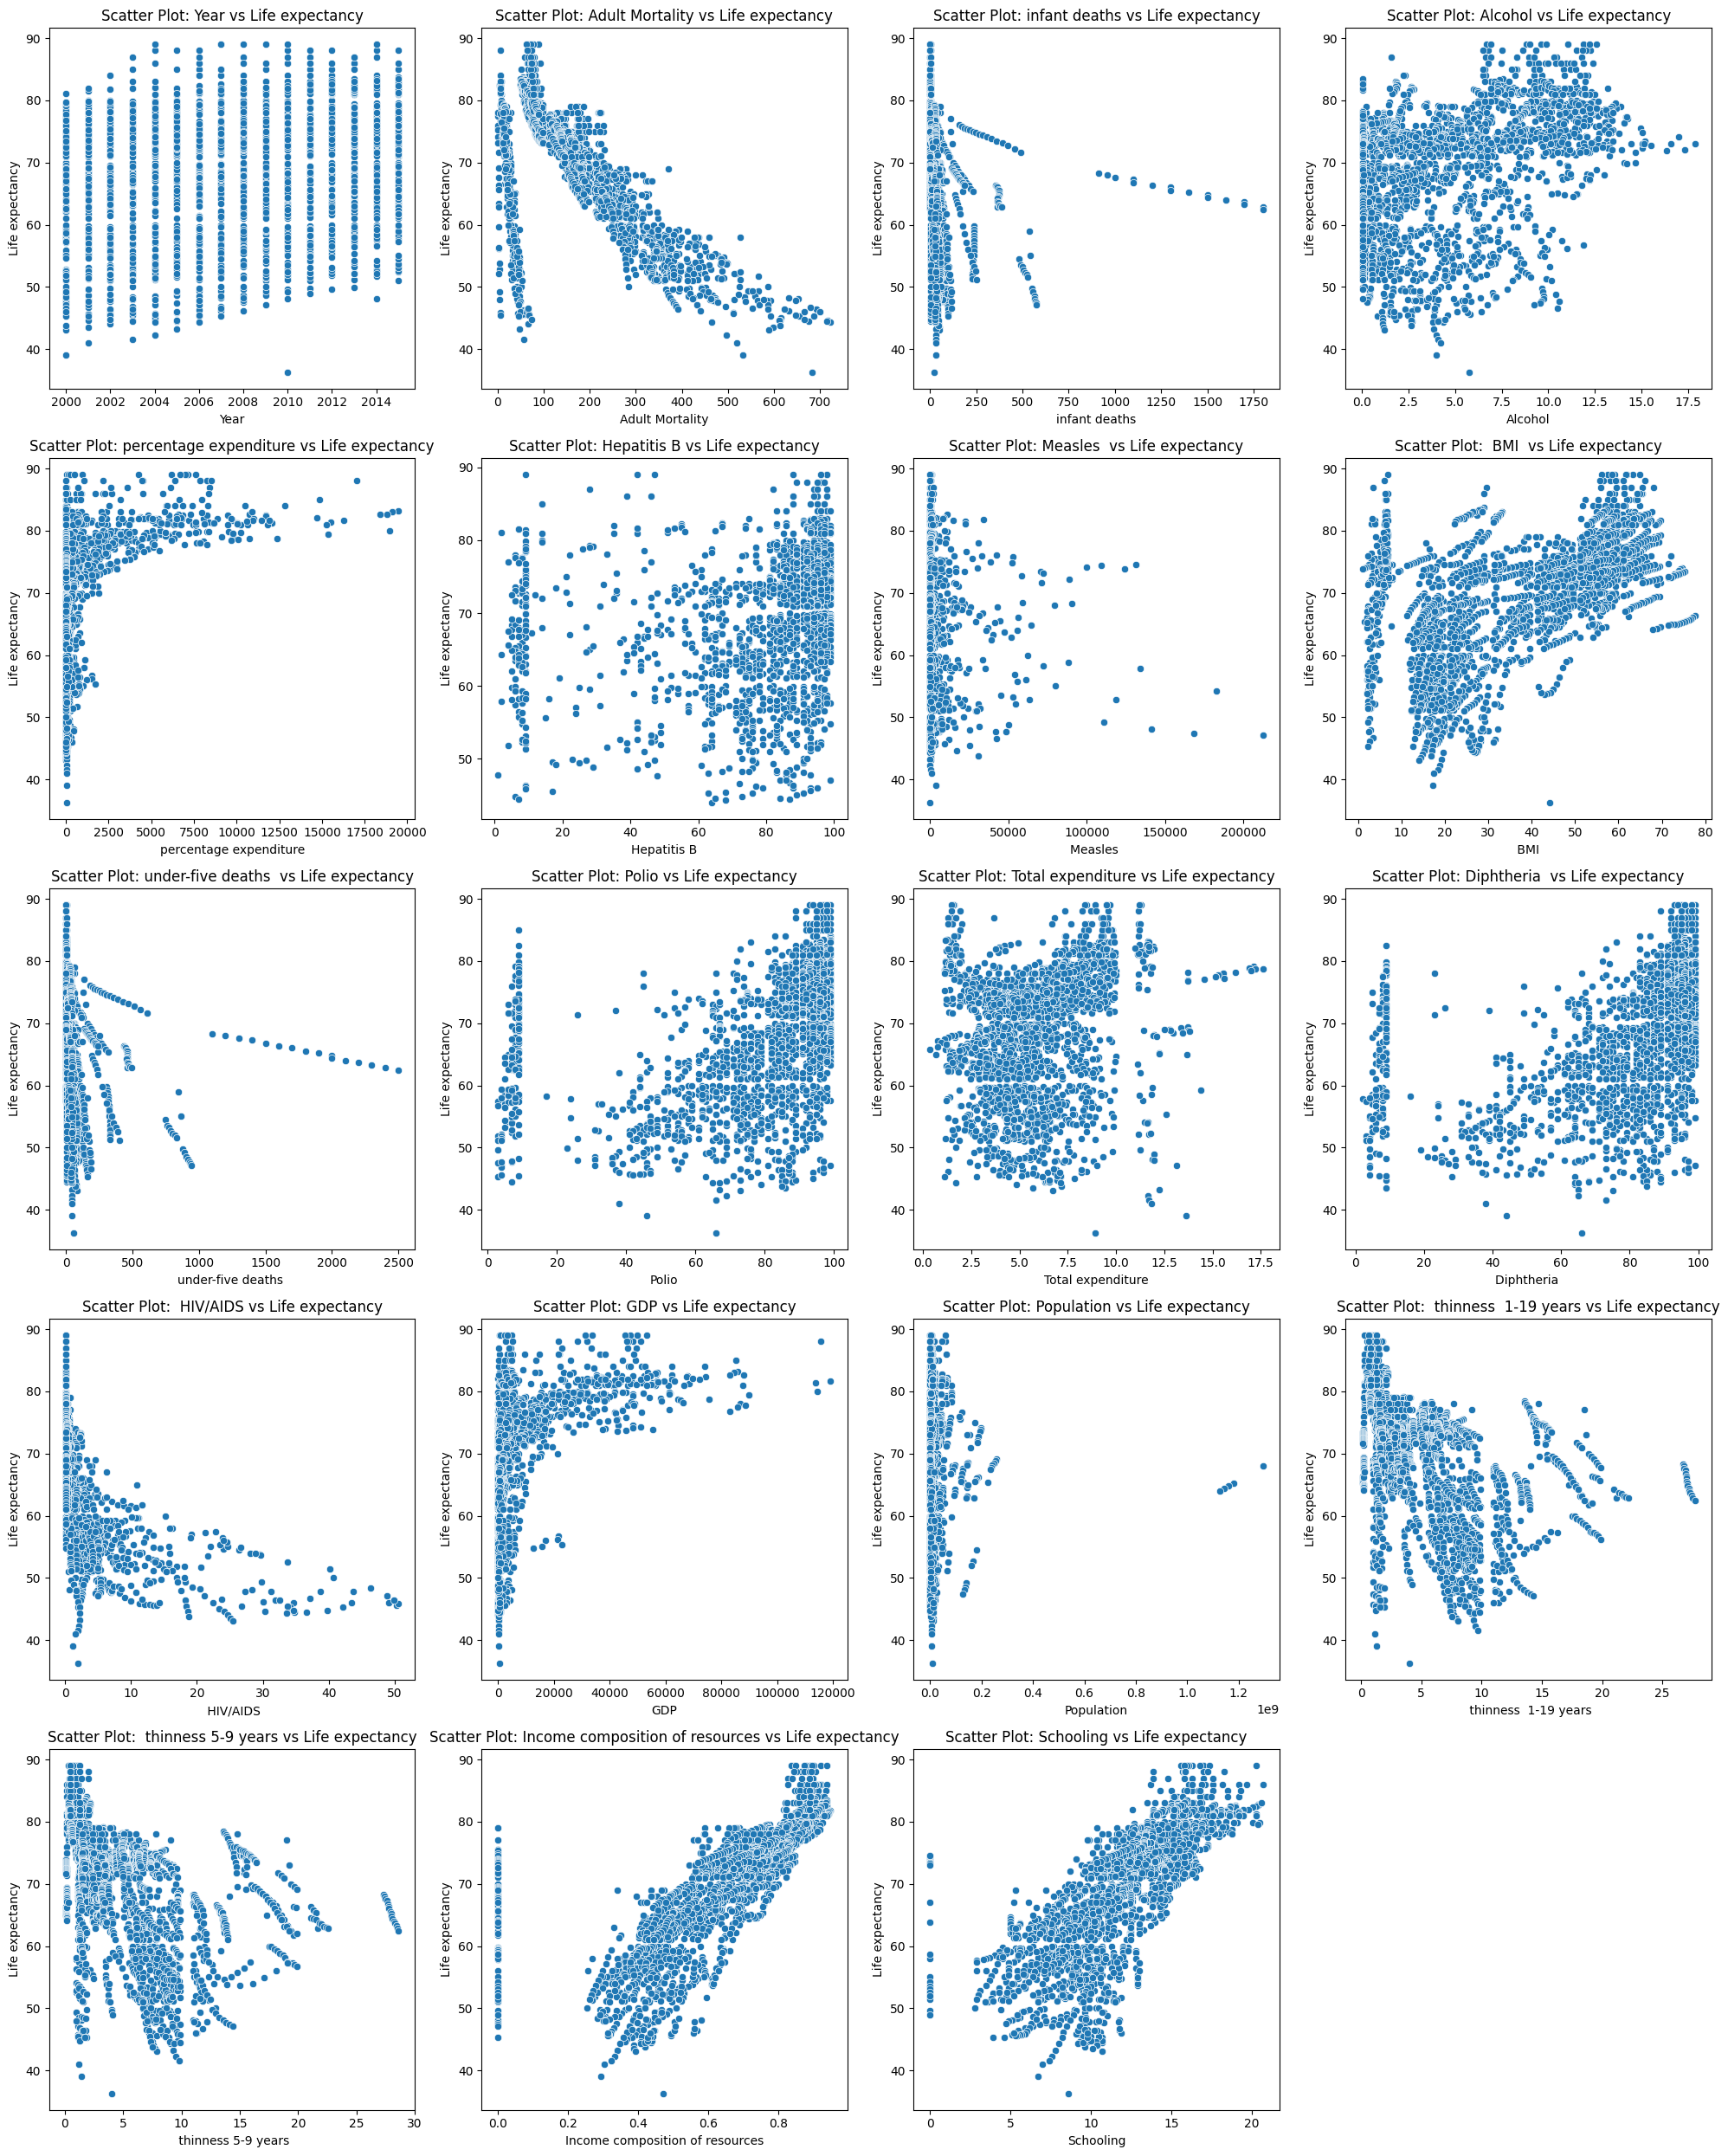

In [ ]:
# Columns to plot
scatter_columns = [
    'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Set the number of plots per row
plots_per_row = 4
total_plots = len(scatter_columns)
rows = math.ceil(total_plots / plots_per_row)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes for easier indexing

# Generate scatter plots
for i, column in enumerate(scatter_columns):
    sns.scatterplot(data=df, x=column, y='Life expectancy ', ax=axes[i])
    axes[i].set_title(f"Scatter Plot: {column} vs Life expectancy")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Life expectancy')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


<Axes: >

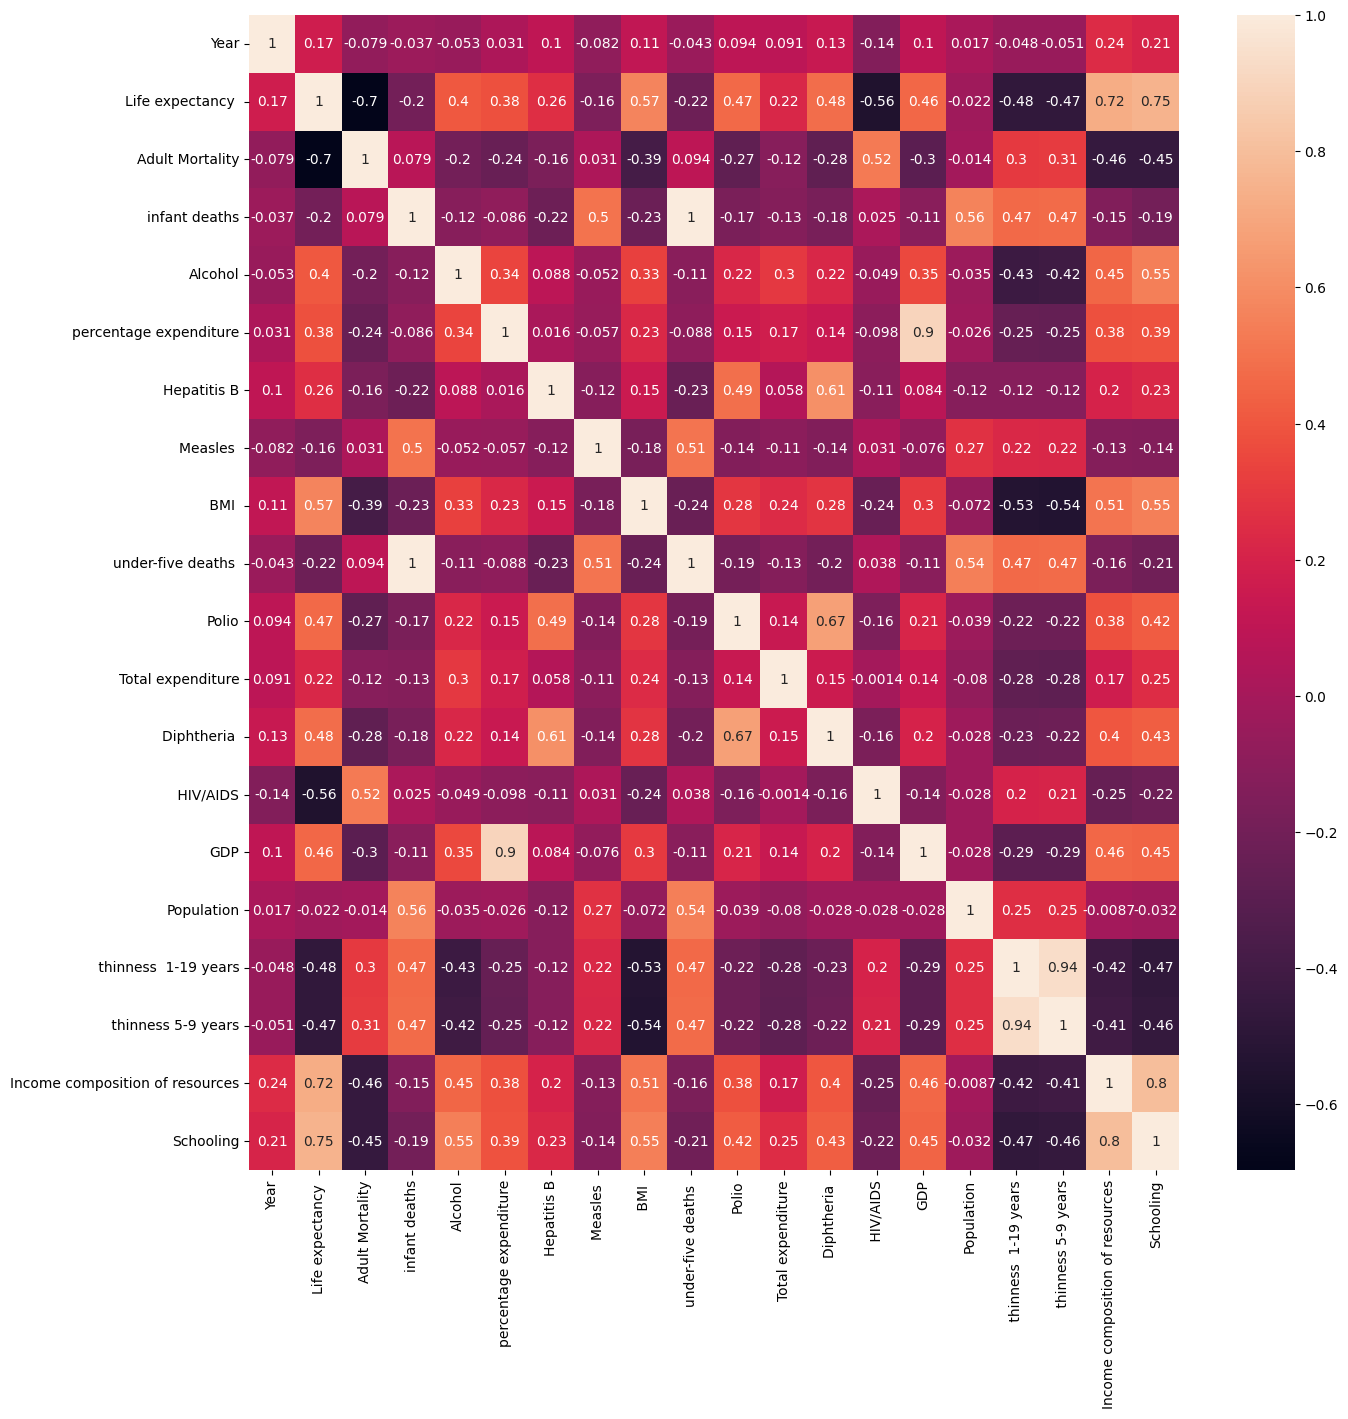

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

# **Data Preprocessing**

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

### **Treating Null Values**

In [ ]:
#find missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


In [ ]:
#Treating missing values using KNN imputer

impute=KNNImputer()
for i in df.select_dtypes(include='number').columns:
  df[i]=impute.fit_transform(df[[i]])

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


### **Treating Duplicates**

In [ ]:
#find duplicates
df.duplicated().sum()

0

### **Treating Outliers**

**Before Treating**

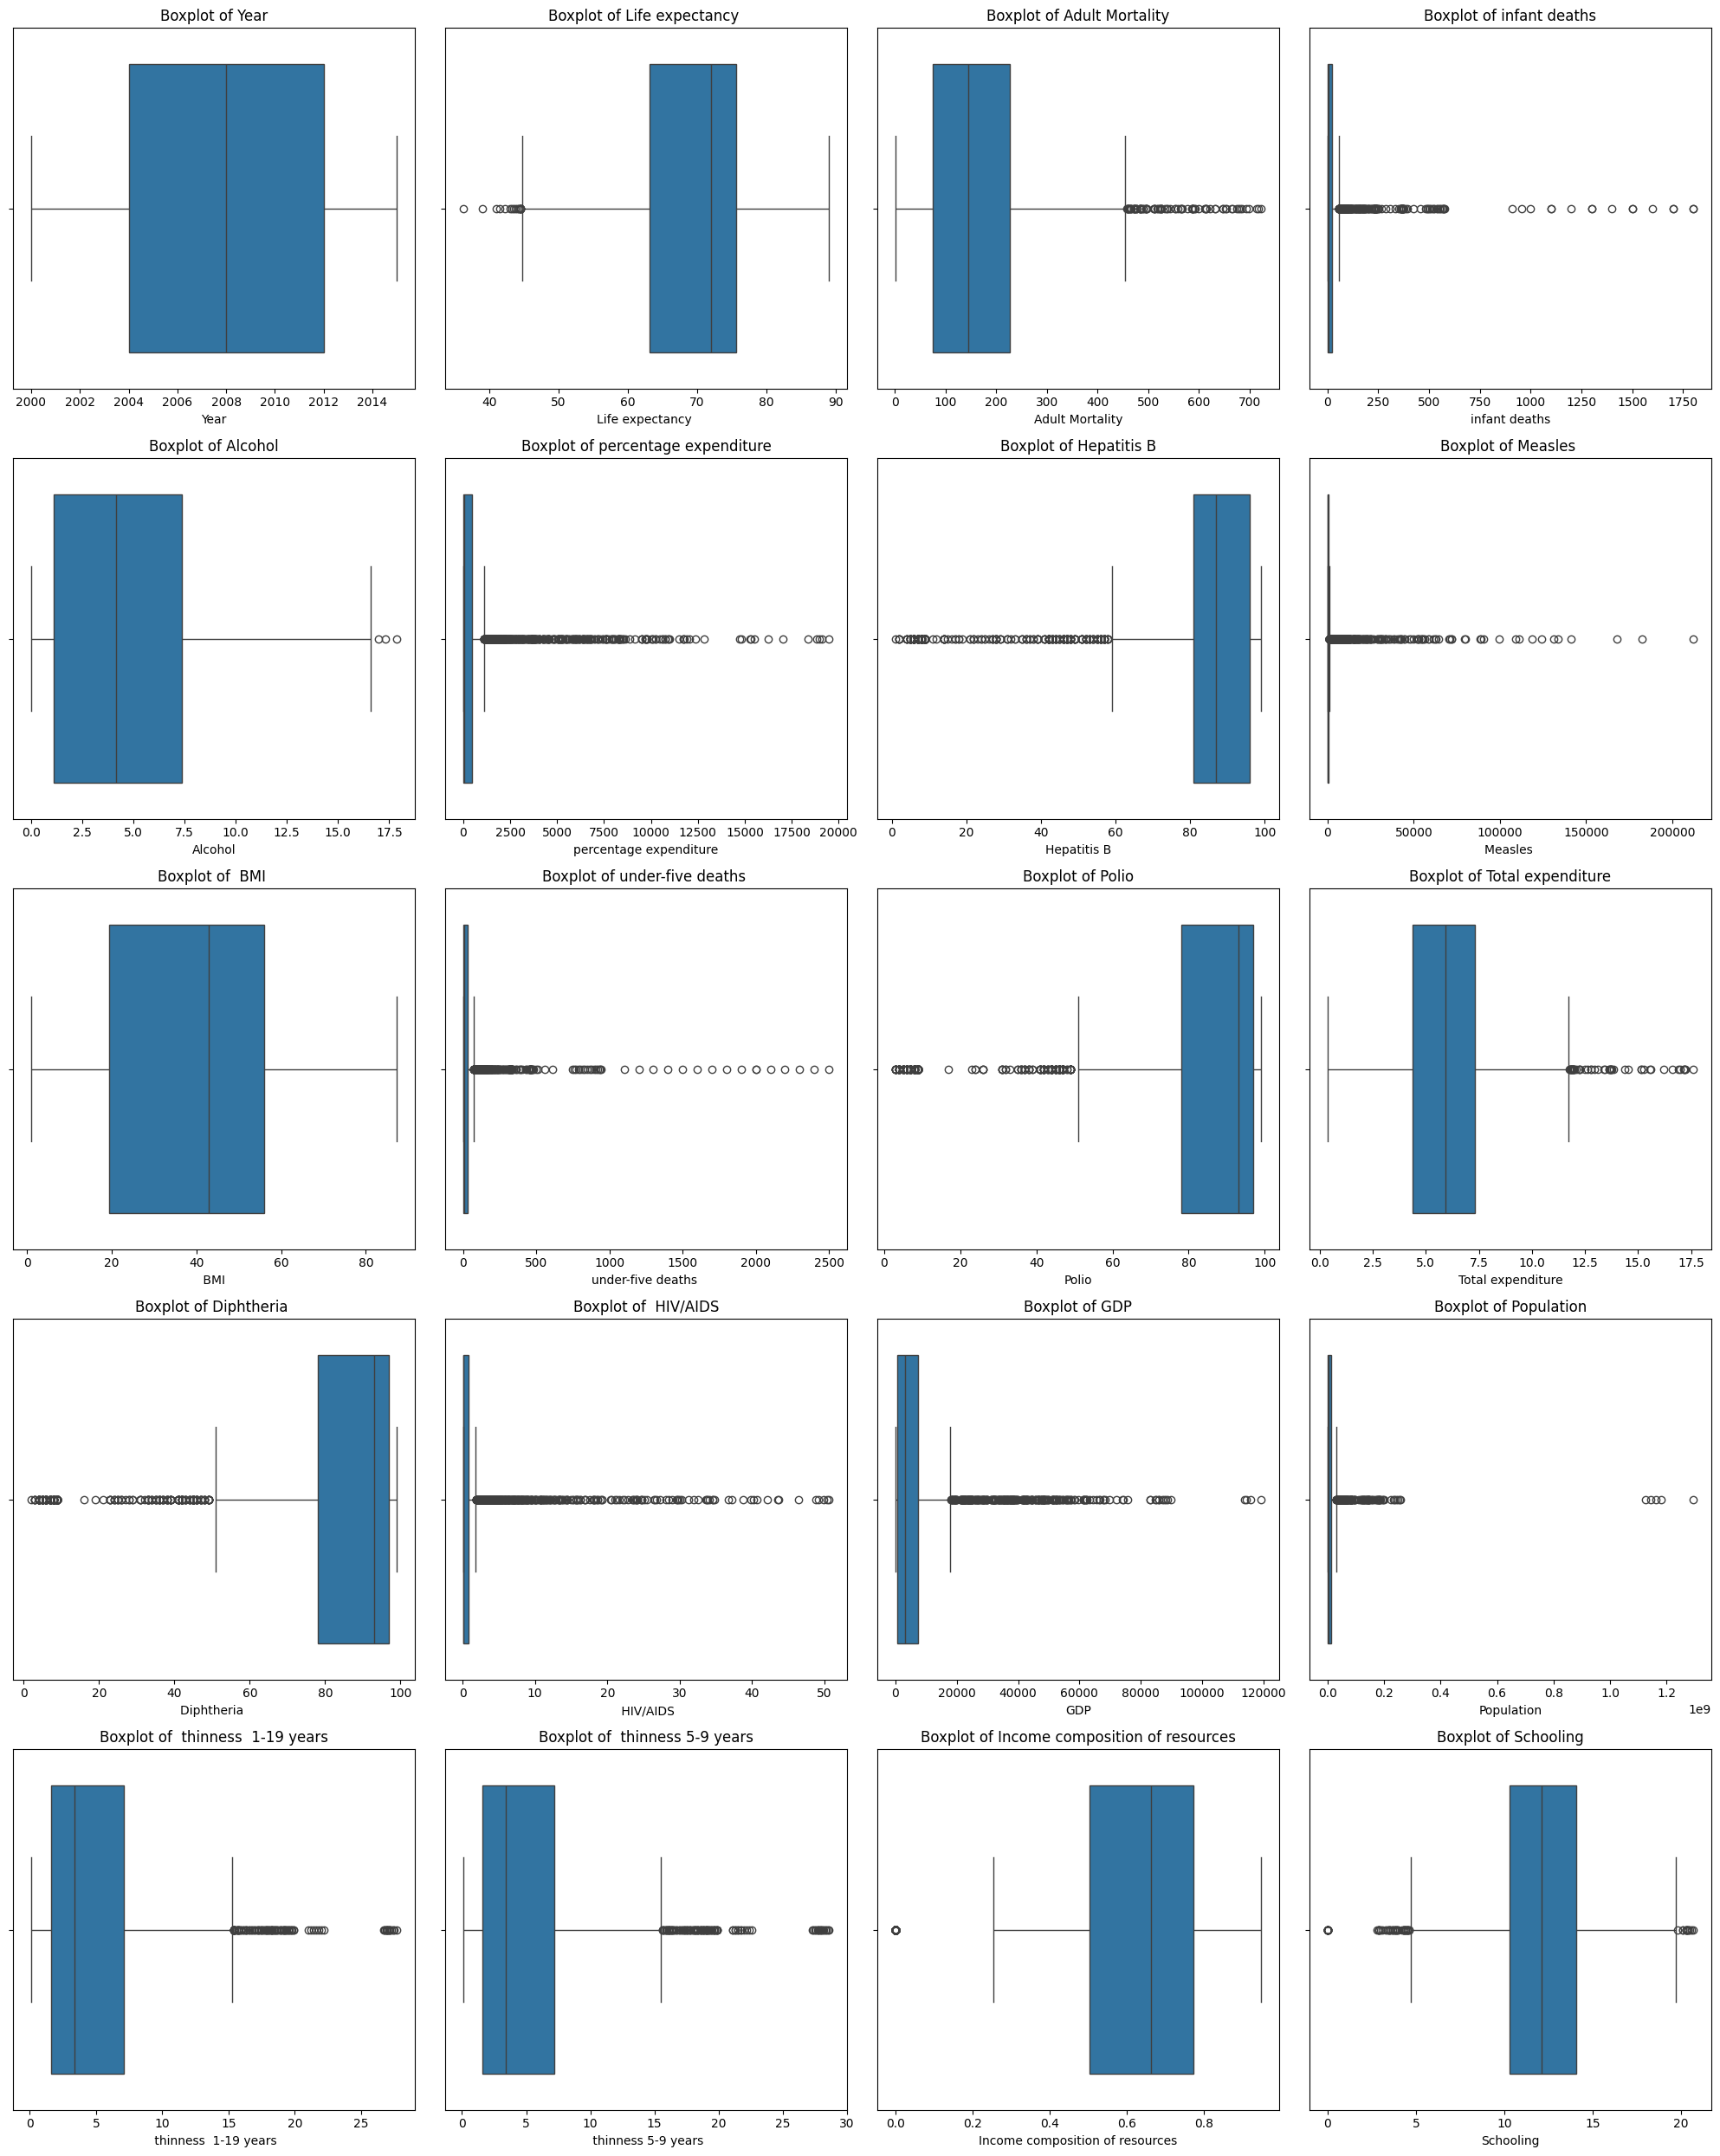

In [ ]:
# Get numerical columns
numeric_columns = df.select_dtypes(include='number').columns

# Create subplots with 4 plots per row
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Identify numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate through numerical features and find outliers
for feature in numerical_features:
    z_scores = zscore(df[feature])
    outliers = df[abs(z_scores) > 3]

    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[feature]])
    print("\n")


Feature: Year
Number of outliers: 0


Feature: Life expectancy 
Number of outliers: 2
      Life expectancy 
1127              36.3
2312              39.0


Feature: Adult Mortality
Number of outliers: 40
      Adult Mortality
346             566.0
347             652.0
348             693.0
349             699.0
350             679.0
351             647.0
865             593.0
1127            682.0
1480            566.0
1481            592.0
1482            633.0
1483            654.0
1484            675.0
1485            666.0
1486            648.0
1487            622.0
1488            586.0
1489            543.0
1578            559.0
1579            587.0
1581            615.0
1582            613.0
1584            599.0
1585            588.0
2498            564.0
2502            587.0
2503            568.0
2728            539.0
2729            554.0
2916            554.0
2917            578.0
2920            611.0
2921            614.0
2928            587.0
2929            632.0
293

**After Treating**

Outliers treated successfully!


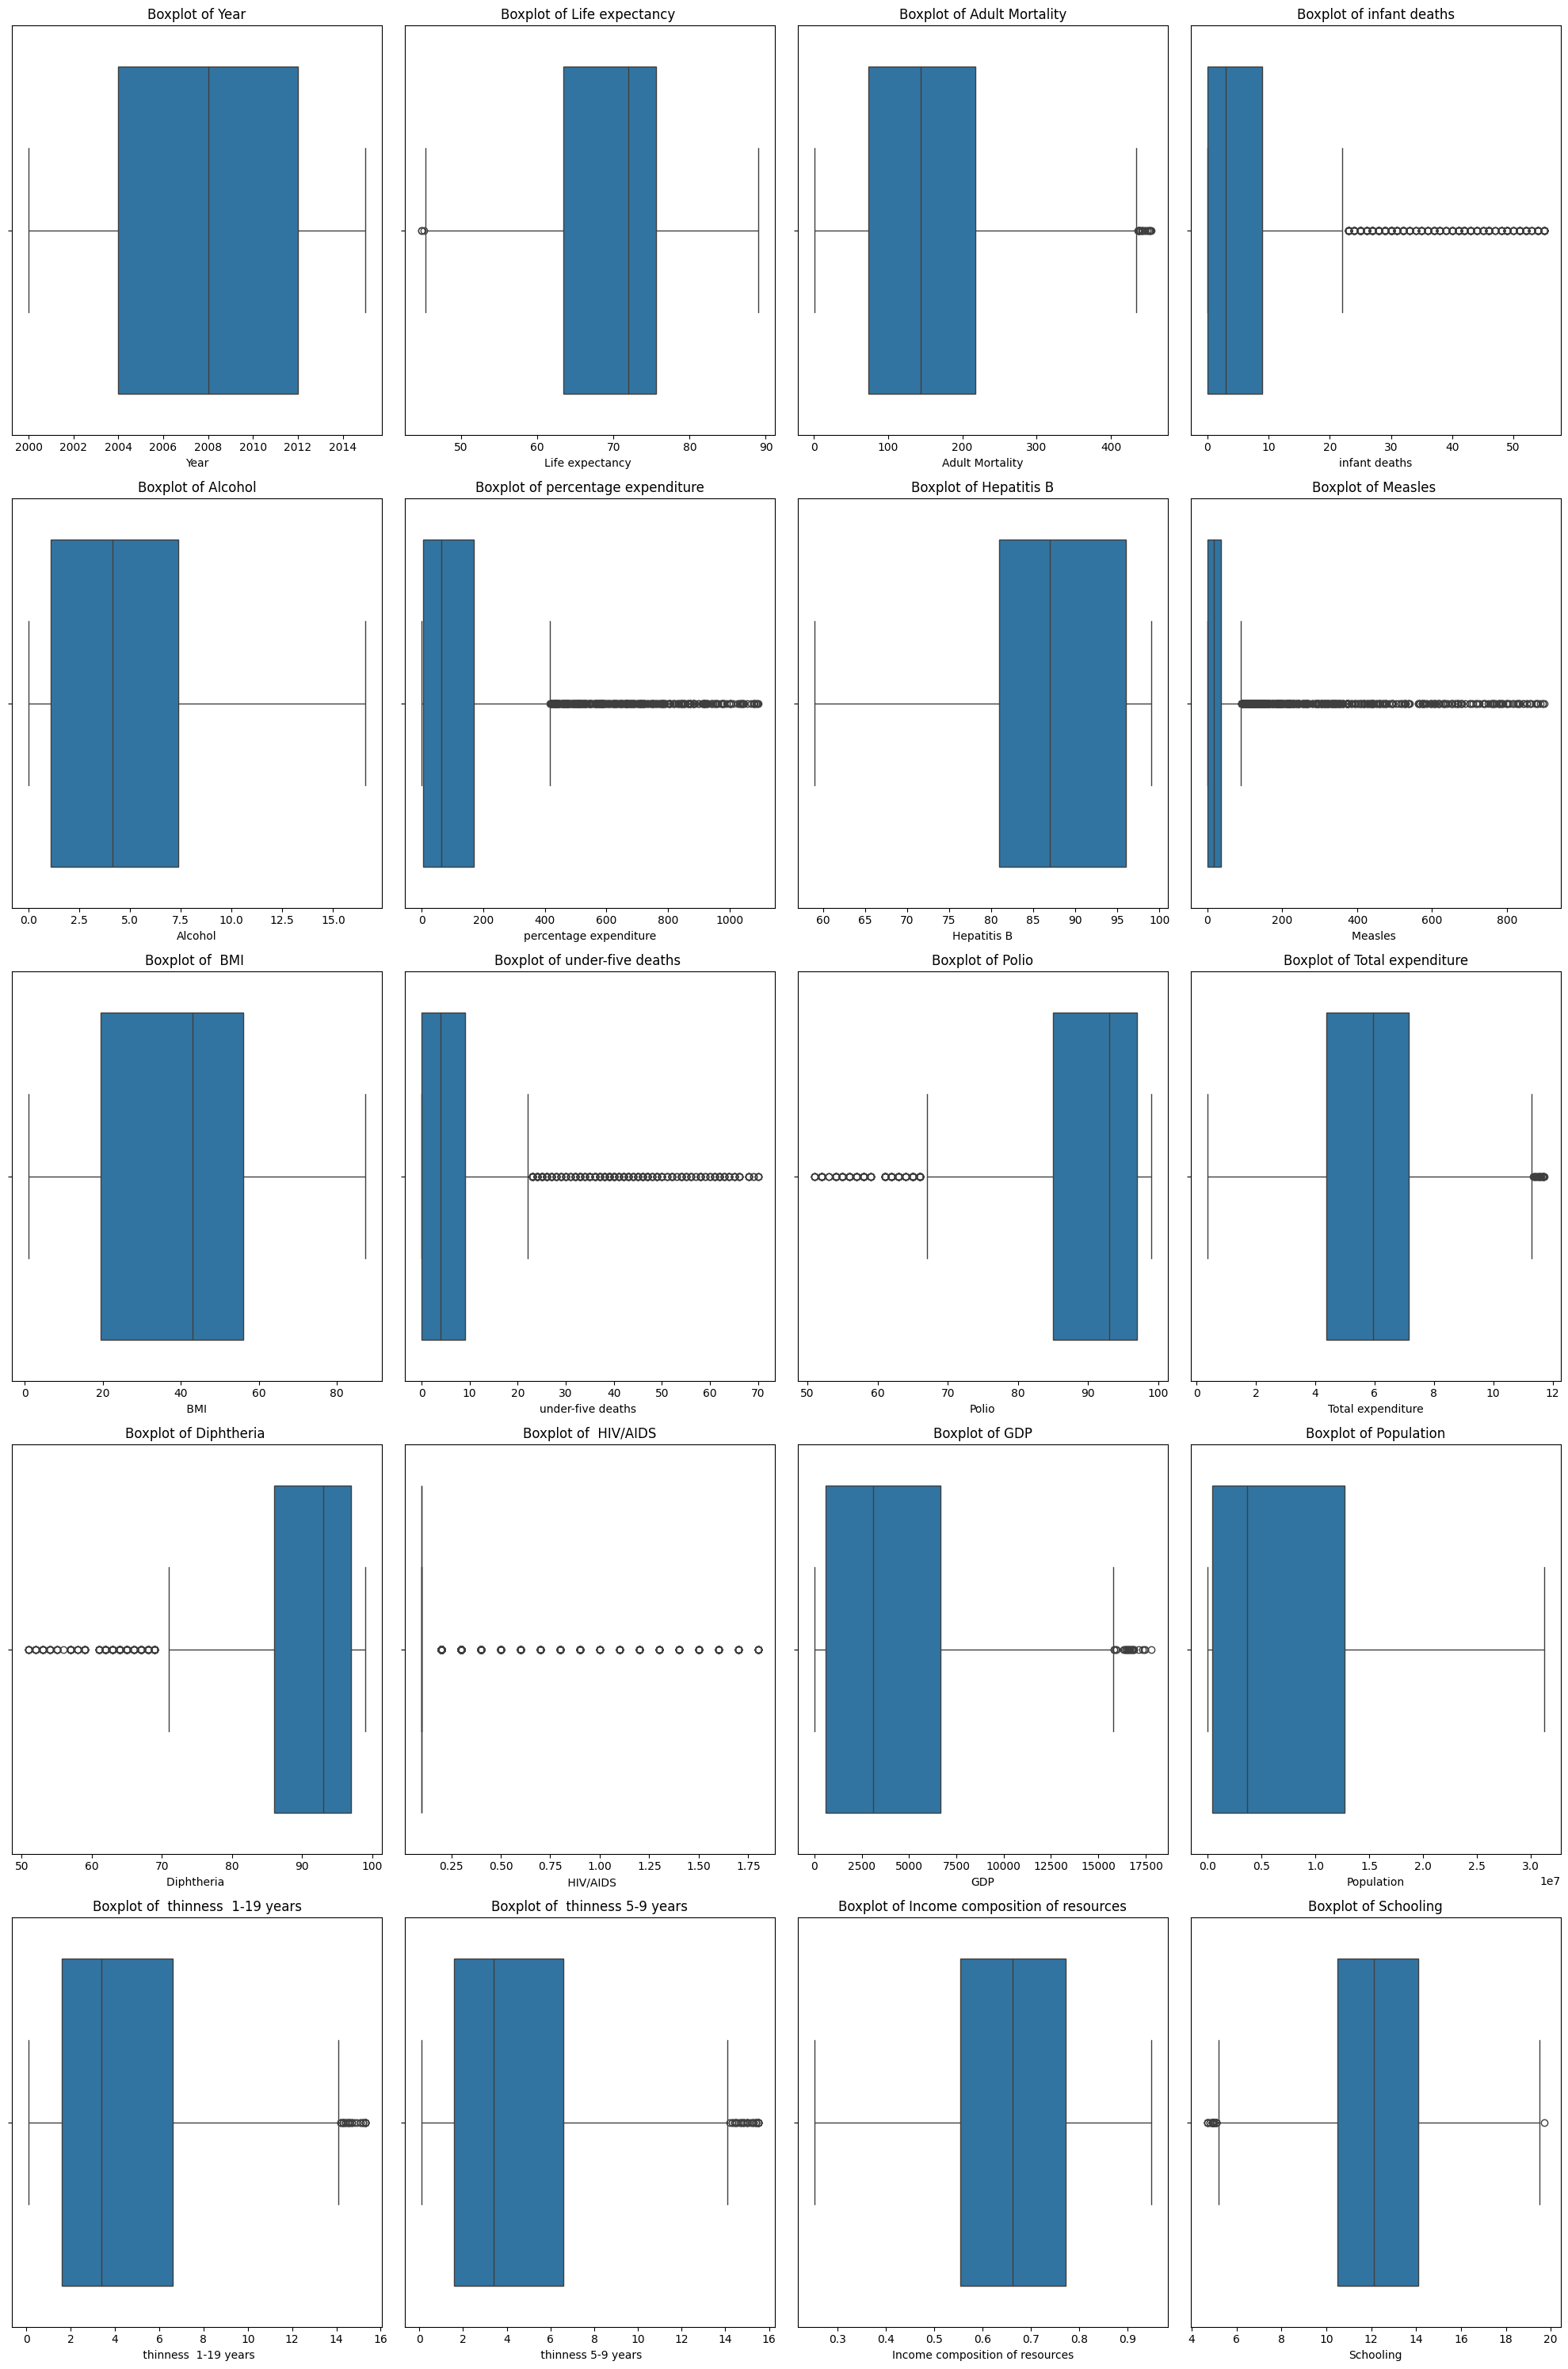

In [ ]:
# Treating outliers using IQR method
def treat_outliers_iqr(dataframe, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    median = df[column].median()
    df[column] = df[column].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )

# Apply outlier treatment to all numeric columns
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    treat_outliers_iqr(df, column)

print("Outliers treated successfully!")

# Visualizing numeric columns after treating outliers using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols // 4 + (num_cols % 4 > 0)), ncols=4, figsize=(20, num_cols * 1.5))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



### **Encoding Categorical Data**

In [ ]:
dummy=pd.get_dummies(data=df,columns=['Country','Status'],drop_first=True)
dummy

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,3.0,0.01,71.279624,65.0,17.0,19.1,4.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,3.0,0.01,73.523582,62.0,492.0,18.6,4.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,3.0,0.01,73.219243,64.0,430.0,18.1,4.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,3.0,0.01,78.184215,67.0,17.0,17.6,4.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,3.0,0.01,7.097109,68.0,17.0,17.2,4.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,72.0,144.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,72.0,144.0,26.0,4.06,0.000000,87.0,17.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,144.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


# **Model Training and Evaluation**

### **Feature Selection**

In [ ]:
# Correlation with target
correlation_with_target = dummy.corr()['Life expectancy '].sort_values(ascending=False)
print(correlation_with_target)

# Drop features with low correlation
dummy = dummy.drop(columns=[col for col in numerical_cols if correlation_with_target[col] < 0.1])


Life expectancy                    1.000000
Income composition of resources    0.813097
Schooling                          0.716232
 BMI                               0.556561
Polio                              0.461337
                                     ...   
infant deaths                     -0.392307
Status_Developing                 -0.484740
 thinness 5-9 years               -0.543444
 thinness  1-19 years             -0.549163
Adult Mortality                   -0.597022
Name: Life expectancy , Length: 213, dtype: float64


In [ ]:
# Feature selection using RFE
X = dummy.drop('Life expectancy ', axis=1)
y = dummy['Life expectancy ']

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Year', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ',
       'Polio', 'Total expenditure', 'Diphtheria ',
       'Income composition of resources', 'Schooling'],
      dtype='object')


### **Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Use the selected features for the dataset
X_selected = df[selected_features]
y = dummy['Life expectancy ']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2350, 10)
Testing set size: (588, 10)


### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

### **Random forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### **Evaluate the Test set**

In [ ]:
# Predict using Linear Regression model
linear_preds = linear_model.predict(X_test)

# Predict using Random Forest model
rf_preds = rf_model.predict(X_test)

# Create a DataFrame to compare predictions and actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': linear_preds,
    'Random Forest': rf_preds
})

# Display the comparison DataFrame
print("\nComparison of Actual and Predicted Values:")
print(comparison_df)

# Calculate evaluation metrics for both models
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, linear_preds), r2_score(y_test, rf_preds)],
    'Mean Squared Error': [mean_squared_error(y_test, linear_preds), mean_squared_error(y_test, rf_preds)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, linear_preds)), np.sqrt(mean_squared_error(y_test, rf_preds))]
}

metrics_df = pd.DataFrame(metrics)

# Display the evaluation metrics
print("\nEvaluation Metrics:")
print(metrics_df)


Comparison of Actual and Predicted Values:
      Actual  Linear Regression  Random Forest
2546    73.7          68.271222         72.690
650     75.9          75.766794         73.902
1740    74.2          75.316207         75.655
177     76.8          78.914497         76.078
1377    51.9          58.435550         55.713
...      ...                ...            ...
859     59.7          57.345725         61.517
1405    73.5          76.260964         73.713
962     61.1          61.096139         60.902
2658    69.6          72.884761         71.125
2272    74.0          72.734154         72.808

[588 rows x 3 columns]

Evaluation Metrics:
               Model  R2 Score  Mean Squared Error  Root Mean Squared Error
0  Linear Regression  0.697784           25.232756                 5.023222
1      Random Forest  0.906069            7.842543                 2.800454


### **Comparison betweeen two Models using Evaluation Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)
print("R² Score:", r2_linear)

# Evaluate Random Forest Regression
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Performance:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R² Score:", r2_rf)

# Compare Performance
print("\nPerformance Comparison:")
print(f"Linear Regression - R²: {r2_linear:.2f}, RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

Linear Regression Performance:
MSE: 25.23275614228864
RMSE: 5.023221689542344
MAE: 3.527277206382174
R² Score: 0.6977836397137049

Random Forest Regression Performance:
MSE: 7.842543438205124
RMSE: 2.8004541485632513
MAE: 1.8753769179119735
R² Score: 0.9060687259086496

Performance Comparison:
Linear Regression - R²: 0.70, RMSE: 5.02, MAE: 3.53
Random Forest - R²: 0.91, RMSE: 2.80, MAE: 1.88


# **Conclusion**

Random Forest Regression significantly outperforms Linear Regression across all metrics. It achieves a much lower RMSE (2.80 vs. 5.02) and MAE (1.88 vs. 3.53), indicating its predictions are more accurate and closer to the actual values. The higher R² score of 0.91 compared to Linear Regression’s 0.70 highlights that Random Forest explains a larger portion of the data’s variability.

Linear Regression is simpler and easier to interpret but struggles with nonlinear relationships in the dataset, leading to higher errors. Random Forest, on the other hand, can capture complex patterns due to its ensemble nature, but it comes with higher computational costs and reduced interpretability.

For this dataset, Random Forest is the superior choice due to its higher accuracy and better fit to the data. However, if computational efficiency or model interpretability is crucial, Linear Regression might still be considered depending on the specific application.

# **References**


1. **Scikit-learn Developers**, ["Linear Regression - Scikit-learn Documentation"](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares), Available at: [https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares).

2. **Scikit-learn Developers**, ["Random Forest - Scikit-learn Documentation"](https://scikit-learn.org/stable/modules/ensemble.html#random-forest), Available at: [https://scikit-learn.org/stable/modules/ensemble.html#random-forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forest).

3. **Scikit-learn Developers**, ["Regression Metrics: R² and Mean Squared Error"](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics), Available at: [https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

